In [38]:
!pip3 install BeautifulSoup
!pip3 install prophet
!pip3 install selenium
!pip3 install requests
from bs4 import BeautifulSoup
import requests
from google.colab import files

  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [39]:
import requests
url = 'https://example.com/suppliers'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
supplier_names = [tag.text for tag in soup.find_all('h3', class_='supplier-name')]


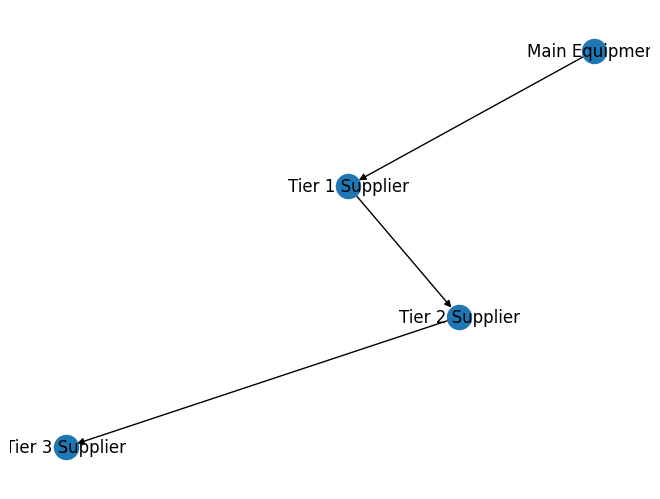

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ('Main Equipment', 'Tier 1 Supplier'),
    ('Tier 1 Supplier', 'Tier 2 Supplier'),
    ('Tier 2 Supplier', 'Tier 3 Supplier'),
])

nx.draw(G, with_labels=True)
plt.show()

Risk score Assignment

In [41]:
def calculate_risk(ownership, origin_country):
    score = 0
    if ownership == 'SOE':
        score += 1
    if origin_country in ['China', 'Pakistan', 'Turkey', 'Afghanistan', 'Bangladesh']:
        score += 5
    return score

In [42]:
# Import necessary library
import pandas as pd

# Step 1: Define detailed dataset for weapon system components
detailed_data = {
    "Component Name": [
        "V-92S2 Diesel Engine", "Thermal Imager", "Communication Radio", "Kontakt-5 ERA",
        "Composite Armor Plates", "1A45T Fire Control System", "Gunner’s Primary Sight",
        "Commander’s Panoramic Sight", "Navigation System", "Digital Fire Control Unit",
        "Track Assembly", "Gun Barrel (2A46M)", "Smoke Grenade Launchers",
        "Autoloader System", "Gun Stabilization Unit"
    ],
    "Function": [
        "Propulsion System", "Target Acquisition", "Internal Communications", "Tank Protection",
        "Tank Protection", "Targeting", "Target Acquisition",
        "Surveillance & Targeting", "Battlefield Navigation", "Ballistic Computation",
        "Mobility", "Main Weapon System", "Self-protection",
        "Ammo Loading", "Targeting System"
    ],
    "Vendor": [
        "Chelyabinsk Tractor Plant", "Peleng", "BEL / ECIL", "Russian OEM",
        "DRDO / Mishra Dhatu Nigam", "UralVagonZavod", "Peleng",
        "Thales", "DRDO / BEL", "BEL",
        "HVF / Russian OEM", "OFB under license", "BEL / Russian OEM",
        "Russian OEM", "Russia / India"
    ],
    "Country": [
        "Russia", "Belarus", "India", "Russia",
        "India", "Russia", "Belarus",
        "France", "India", "India",
        "India", "India", "India",
        "Russia", "Russia"
    ]
}

# Step 2: Create DataFrame
df = pd.DataFrame(detailed_data)

# Save the original dataset to CSV
df.to_csv("detailed_components.csv", index=False)

# Step 3: Define country risk levels
hostile = ["Turkey", "China", "Pakistan", "Afghanistan", "Bangladesh"]
moderate = ["Belarus"]
friendly = ["India", "USA", "Israel", "France", "Germany", "Russia"]

def classify_country(country):
    if country in hostile:
        return "Hostile"
    elif country in moderate:
        return "Moderately Hostile"
    elif country in friendly:
        return "Friendly"
    else:
        return "Unknown"

# Step 4: Add risk classification column
df["Risk Category"] = df["Country"].apply(classify_country)

# Step 5: Alternate supplier database by component function
alternate_db = {
    "Propulsion System": ["MTU (Germany)", "Cummins (USA)"],
    "Target Acquisition": ["Elbit Systems (Israel)", "Thales (France)"],
    "Tank Protection": ["DRDO (India)", "Kalyani Group (India)"],
    "Internal Communications": ["BEL (India)", "Thales (France)"],
    "Targeting": ["Thales (France)", "Raytheon (USA)"],
    "Surveillance & Targeting": ["Thales (France)", "Elbit Systems (Israel)"],
    "Battlefield Navigation": ["BEL (India)", "Honeywell (USA)"],
    "Ballistic Computation": ["BEL (India)", "Elbit Systems (Israel)"],
    "Mobility": ["BEML (India)", "MTU (Germany)"],
    "Main Weapon System": ["OFB (India)", "Nexter (France)"],
    "Self-protection": ["DRDO (India)", "Elbit Systems (Israel)"],
    "Ammo Loading": ["DRDO (India)", "Kalyani Group (India)"],
    "Targeting System": ["Raytheon (USA)", "Thales (France)"]
}

# Step 6: Define alternate supplier suggestion function
def suggest_alternates(function, risk):
    if risk in ["Hostile", "Moderately Hostile"]:
        return ", ".join(alternate_db.get(function, ["No suggestion available"]))
    else:
        return "No alternate needed"

# Step 7: Add alternate suggestions to DataFrame
df["Alternate Supplier Suggestion"] = df.apply(
    lambda x: suggest_alternates(x["Function"], x["Risk Category"]), axis=1
)

# Step 8: Save the full report to CSV
df.to_csv("supply_chain_full_report.csv", index=False)

# Final message
print("Supply chain analysis complete.")
print("detailed_components.csv' - raw data")
print("supply_chain_full_report.csv' - full analysis with risk and suggestions")

Supply chain analysis complete.
detailed_components.csv' - raw data
supply_chain_full_report.csv' - full analysis with risk and suggestions


In [43]:
df.to_csv("supply_chain_analysis_output.csv", index=False)

In [44]:
files.download('supply_chain_analysis_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Component list

In [45]:
uploaded = files.upload()

Saving detailed_components.csv to detailed_components (3).csv


In [46]:
uploaded = files.upload()

Saving thermal_imager_demand.csv to thermal_imager_demand (2).csv


In [47]:
import pandas as pd

# Read the uploaded CSV file
df = pd.read_csv("thermal_imager_demand.csv")

# Convert Month to datetime and set it as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Extract the demand series for ARIMA
thermal_imager_demand = df['Demand Units']


ARIMA Forecast for Thermal Imager of T90 Tank

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/tmp/ipython-input-48-1659321149.py:10: FutureWarning:

'M' is deprecated and will be removed in a future versi

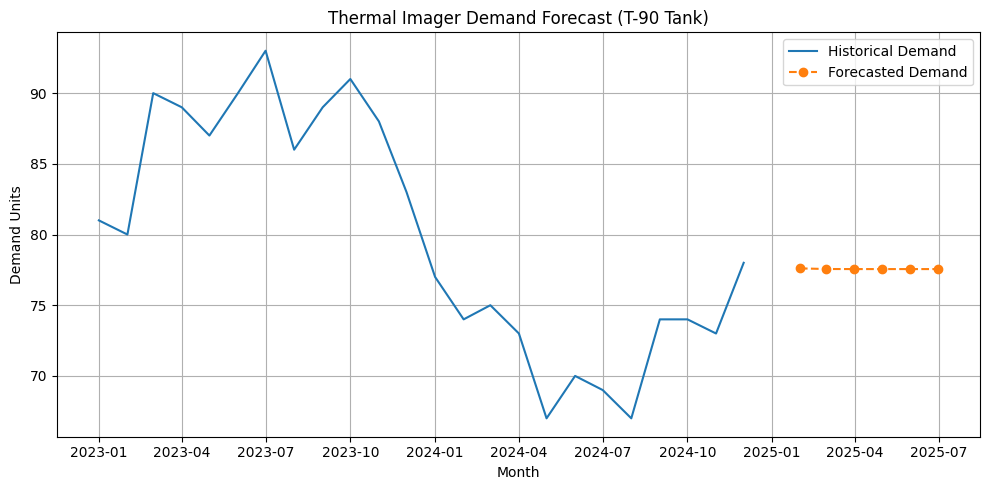

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

\  Forecast complete. Files generated:
   thermal_imager_forecast.csv
   thermal_imager_forecast_plot.png


In [48]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(thermal_imager_demand, order=(1, 1, 1))
model_fit = model.fit()

# Step 7: Forecast next 6 months
forecast = model_fit.forecast(steps=6)
forecast_dates = pd.date_range(start=thermal_imager_demand.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')

# Step 8: Create forecast DataFrame
forecast_df = pd.DataFrame({
    "Date": forecast_dates,
    "Forecasted Demand (Units)": forecast.values
})

# Step 9: Save forecast to CSV
forecast_df.to_csv("thermal_imager_forecast.csv", index=False)

# Step 10: Plot historical + forecasted demand
plt.figure(figsize=(10, 5))
plt.plot(thermal_imager_demand, label="Historical Demand")
plt.plot(forecast_dates, forecast.values, label="Forecasted Demand", linestyle="--", marker="o")
plt.title("Thermal Imager Demand Forecast (T-90 Tank)")
plt.xlabel("Month")
plt.ylabel("Demand Units")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("thermal_imager_forecast_plot.png")
plt.show()

# Step 11: Download results
files.download("thermal_imager_forecast.csv")
files.download("thermal_imager_forecast_plot.png")

# Final output message
print("\  Forecast complete. Files generated:")
print("   thermal_imager_forecast.csv")
print("   thermal_imager_forecast_plot.png")


ML Forecasting for thermal imager of T90 tank

In [49]:
import pandas as pd
from prophet import Prophet

# Step 1: Load and clean dataset
demand_data = pd.read_csv('thermal_imager_demand.csv')

# Clean column names
demand_data.columns = demand_data.columns.str.strip().str.title()

# Check required columns
required_cols = {"Month", "Component", "Demand Units"}
if not required_cols.issubset(set(demand_data.columns)):
    raise ValueError(f"CSV file missing required columns. Found: {demand_data.columns.tolist()}")

# Clean values
demand_data["Component"] = demand_data["Component"].astype(str).str.strip()
demand_data["Month"] = pd.to_datetime(demand_data["Month"], errors="coerce")
demand_data["Demand Units"] = pd.to_numeric(demand_data["Demand Units"], errors="coerce")

# Drop any rows with invalid data
demand_data = demand_data.dropna(subset=["Month", "Component", "Demand Units"])

# Save cleaned file for manual inspection
demand_data.to_csv("cleaned_thermal_demand.csv", index=False)

# Print sample and unique components
print("Cleaned sample data:")
print(demand_data.sample(min(5, len(demand_data))))
print("\n🔍 Unique components found:")
print(demand_data["Component"].unique())

# Step 2: Supplier database
supplier_info = {
    "MTU (Germany)": {
        "Country": "Germany",
        "Annual Capacity": 1000,
        "Quality Certs": ["ISO 9001", "NATO Standard"],
        "Past Export to India": True,
    },
    "Cummins (USA)": {
        "Country": "USA",
        "Annual Capacity": 1200,
        "Quality Certs": ["ISO 9001"],
        "Past Export to India": False,
    },
    "Ebit Systems (Israel)": {
        "Country": "Israel",
        "Annual Capacity": 800,
        "Quality Certs": ["ISO 9001", "NATO Standard"],
        "Past Export to India": True,
    },
    "Raytheon (USA)": {
        "Country": "USA",
        "Annual Capacity": 900,
        "Quality Certs": ["ISO 9001"],
        "Past Export to India": True,
    }
}

# Step 3: Alternate suppliers by function/component
alternate_suppliers = {
    "Propulsion System": ["MTU (Germany)", "Cummins (USA)"],
    "Targeting": ["Raytheon (USA)", "Ebit Systems (Israel)"],
}

# Step 4: Quality standards
quality_standards = {
    "Propulsion System": ["ISO 9001", "NATO Standard"],
    "Targeting": ["ISO 9001"],
}

# Step 5: Forecasting function
def forecast_demand(df, component_name, months=6):
    comp_df = df[df["Component"] == component_name][["Month", "Demand Units"]].rename(columns={"Month": "ds", "Demand Units": "y"})
    if len(comp_df) < 2:
        print(f" Skipping {component_name}: insufficient data.")
        return 0
    try:
        model = Prophet()
        model.fit(comp_df)
        future = model.make_future_dataframe(periods=months, freq='M')
        forecast = model.predict(future)
        return round(forecast.tail(months)["yhat"].mean())
    except Exception as e:
        print(f" Forecasting failed for {component_name}: {e}")
        return 0

# Step 6: Supplier capability checker
def check_supplier(supplier_name, forecast_units, quality_required):
    info = supplier_info.get(supplier_name, {})
    if not info:
        return "Unknown Supplier"
    if info["Annual Capacity"] < forecast_units:
        return "Insufficient Capacity"
    if not set(quality_required).issubset(set(info["Quality Certs"])):
        return "Quality Mismatch"
    return "Suitable"

# Step 7: Process each component
final_results = []

components = demand_data["Component"].unique()

for comp in components:
    print(f"\n Processing component: {comp}")
    forecast_units = forecast_demand(demand_data, comp)
    if forecast_units == 0:
        continue
    function = comp  # assuming component = function
    alt_list = alternate_suppliers.get(function, [])
    quality_req = quality_standards.get(function, ["ISO 9001"])

    if not alt_list:
        print(f" No alternate suppliers found for {comp}")
        continue

    for supplier in alt_list:
        status = check_supplier(supplier, forecast_units, quality_req)
        print(f"  - {supplier}: {status}")
        final_results.append({
            "Component": comp,
            "Forecast Demand (next 6 months)": forecast_units,
            "Alternate Supplier": supplier,
            "Capability Assessment": status
        })

# Step 8: Export final results
df_result = pd.DataFrame(final_results)
print("\nFinal Results Preview:")
print(df_result)

if not df_result.empty:
    df_result.to_csv("supply_chain_demand_forecast_and_suitability.csv", index=False)
    print("\n Report saved as 'supply_chain_demand_forecast_and_suitability.csv'")
else:
    print("\n No valid results to export. Please inspect 'cleaned_thermal_demand.csv' for data issues.")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp28mh3b_s/9k9lx171.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp28mh3b_s/h12dqqz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21093', 'data', 'file=/tmp/tmp28mh3b_s/9k9lx171.json', 'init=/tmp/tmp28mh3b_s/h12dqqz0.json', 'output', 'file=/tmp/tmp28mh3b_s/prophet_modelk91fyefu/prophet_model-20250706103931.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:39:31 - cmdstanpy - INFO - Chain [1] start processing
I

Cleaned sample data:
        Month       Component Tank Model  Demand Units
13 2024-02-01  Thermal Imager       T-90            74
8  2023-09-01  Thermal Imager       T-90            89
10 2023-11-01  Thermal Imager       T-90            88
6  2023-07-01  Thermal Imager       T-90            93
22 2024-11-01  Thermal Imager       T-90            73

🔍 Unique components found:
['Thermal Imager']

 Processing component: Thermal Imager
 No alternate suppliers found for Thermal Imager

Final Results Preview:
Empty DataFrame
Columns: []
Index: []

 No valid results to export. Please inspect 'cleaned_thermal_demand.csv' for data issues.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Map Showing relation of foreign countries with India

In [50]:
import plotly.express as px
import pandas as pd

# Step 1: Defense relationship data
data = {
    "country": [
        "Russia", "France", "United States", "Israel", "United Kingdom",
        "Germany", "South Korea", "Japan", "Brazil", "Australia",
        "Pakistan", "China", "Iran", "Turkey", "Ukraine", "Belarus",
        "South Africa", "Italy", "Bangladesh"
    ],
    "relationship": [
        "Friendly", "Friendly", "Friendly", "Friendly", "Friendly",
        "Neutral", "Friendly", "Friendly", "Neutral", "Friendly",
        "Hostile", "Hostile", "Neutral", "Hostile", "Neutral", "Friendly",
        "Neutral", "Friendly", "Hostile"
    ]
}

df = pd.DataFrame(data)

# Step 2: Add default 'Unknown' relationship to all countries
world = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv")
full_df = world[["COUNTRY", "CODE"]].rename(columns={"COUNTRY": "country", "CODE": "iso_alpha"})
full_df = full_df.merge(df, on="country", how="left")
full_df["relationship"] = full_df["relationship"].fillna("No Major Defense Trade")

# Step 3: Color mapping
color_map = {
    "Friendly": "green",
    "Neutral": "yellow",
    "Hostile": "red",
    "No Major Defense Trade": "white"
}

# Step 4: Plot map
fig = px.choropleth(
    full_df,
    locations="iso_alpha",
    color="relationship",
    hover_name="country",
    color_discrete_map=color_map,
    title="India's Defense Relationships with World Nations",
    width=750,
    height=450
)

# Step 5: Show borders & simplify
fig.update_traces(marker_line_width=0.3, marker_line_color="black")
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    legend_title="Relationship with India"
)

fig.show()